### Import Libraries

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Assignments

### A

---

**L1 and L2 Regularization:**

Regularization is used in machine learning models to prevent overfitting and improve model generalization. There are two main types of regularization: L1 and L2.

**L1 Regularization (Lasso):**

- **Description:** L1 regularization adds a penalty equal to the sum of the absolute values of the model coefficients. This penalty is the sum of the absolute values of the coefficients multiplied by a regularization parameter (λ).
- **Effect:** L1 regularization can make some coefficients exactly zero. This can lead to automatic feature selection by eliminating some variables from the model.
- **Implementation in scikit-learn:** To use L1 in `LogisticRegression`, you should set the parameter `penalty='l1'`. However, some solvers (such as `'liblinear'`) support L1 in scikit-learn.

   ```python
   from sklearn.linear_model import LogisticRegression
   model = LogisticRegression(penalty='l1', solver='liblinear')
   model.fit(X_train, y_train)
   ```

**L2 Regularization (Ridge):**

- **Description:** L2 regularization adds a penalty equal to the sum of the squares of the model coefficients. This penalty is the sum of the squares of the coefficients multiplied by a regularization parameter (λ).
- **Effect:** L2 regularization tends to reduce coefficients more uniformly, avoiding extremely large values and promoting smaller, more evenly distributed coefficients. It does not tend to make coefficients exactly zero.
- **Implementation in scikit-learn:** To use L2 in `LogisticRegression`, you should set the parameter `penalty='l2'`. This is the default option in scikit-learn.

   ```python
   from sklearn.linear_model import LogisticRegression
   model = LogisticRegression(penalty='l2')
   model.fit(X_train, y_train)
   ```

**Comparison between L1 and L2:**

- **L1 Regularization:**
  - **Advantages:** Performs feature selection by making some coefficients exactly zero. Useful when some features are suspected to be irrelevant.
  - **Disadvantages:** Can be less stable in the presence of highly correlated features.

- **L2 Regularization:**
  - **Advantages:** Penalizes large coefficient values more smoothly and tends to provide more stable solutions. Useful when all features are expected to contribute to the model.
  - **Disadvantages:** Does not perform feature selection, as it does not drive coefficients to zero.

**Choice between L1 and L2:**
- The choice between L1 and L2 depends on the nature of the data and the model’s goal. L1 is preferred when feature selection is needed, while L2 is useful for maintaining more uniform and stable coefficients.

---

### B

---

**Cross-Entropy Loss in Logistic Regression**

**Description:**

Cross-entropy loss, often referred to as log-loss, is a key concept used to measure how well a logistic regression model performs. It is specifically designed for classification problems where the model predicts probabilities that a given input belongs to a particular class.

**How It Works:**

- **Binary Classification:** In a binary classification problem (where there are two classes, like 'spam' and 'ham'), cross-entropy loss calculates how well the predicted probabilities match the actual class labels. The loss increases as the predicted probability diverges from the actual label. 

- **Multi-Class Classification:** For problems with more than two classes, cross-entropy loss generalizes to account for multiple possible categories. It evaluates how close the predicted probability distribution is to the actual distribution of the classes.

**Role in Model Training:**

- **Gradient Descent:** Logistic regression models use gradient descent to minimize the cross-entropy loss. This means the model iteratively adjusts its parameters to reduce the loss, improving the accuracy of its predictions.

- **Model Adjustment:** During training, the model's parameters are updated based on the gradients of the loss function. This helps the model learn from errors and make better predictions.

**Implementation in Scikit-Learn:**

- **Default Behavior:** In `scikit-learn`, the `LogisticRegression` class automatically uses cross-entropy loss as the objective function during training. This ensures that the model is optimized to predict probabilities that are as close as possible to the true class labels.

Here's a quick example of how to use logistic regression in `scikit-learn`:

```python
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
```
--- 


### C

---

**Multi-Class Options in Logistic Regression**

Logistic regression can be extended to handle multi-class classification problems, where there are more than two classes. Scikit-Learn provides several options for dealing with multi-class classification in the `LogisticRegression` class. These options are specified using the `multi_class` parameter.


**1. `multi_class='ovr'` (One-vs-Rest)**

- **Description:**
  The One-vs-Rest (OvR) approach, also known as One-vs-All, involves training a separate binary classifier for each class. For each classifier, the class is treated as the positive class, and all other classes are treated as the negative class.

- **How It Works:**
  - For each class \( c \), a binary logistic regression model is trained to distinguish class \( c \) from all other classes.
  - During prediction, the class with the highest probability from its respective binary classifier is selected as the predicted class.

- **Implementation:**
  By default, `LogisticRegression` uses the OvR approach when the `multi_class` parameter is set to `'ovr'`.

  ```python
  from sklearn.linear_model import LogisticRegression

  model = LogisticRegression(multi_class='ovr')
  model.fit(X_train, y_train)
  ```


**2. `multi_class='multinomial'`**

- **Description:**
  The Multinomial approach directly models the probability of each class using a single logistic regression model. It is based on the softmax function, which generalizes the sigmoid function used in binary classification to multiple classes.

- **How It Works:**
  - The multinomial logistic regression model estimates the probability of each class by considering all classes simultaneously.
  - The softmax function is used to compute the probability of each class.

- **Implementation:**
  To use the multinomial approach, set the `multi_class` parameter to `'multinomial'` and use the `solver='lbfgs'`, `solver='saga'`, or `solver='newton-cg'` (as 'liblinear' does not support multinomial).

  ```python
  from sklearn.linear_model import LogisticRegression

  model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
  model.fit(X_train, y_train)
  ```


**3. `multi_class='auto'`**

- **Description:**
  The `auto` option automatically selects the appropriate multi-class strategy based on the solver. If the solver supports multinomial classification, it will use that. Otherwise, it will default to the One-vs-Rest approach.

- **Implementation:**
  Simply set `multi_class='auto'` (which is also the default value).

  ```python
  from sklearn.linear_model import LogisticRegression

  model = LogisticRegression(multi_class='auto')
  model.fit(X_train, y_train)
  ```

---

### D

---

**`solver='sag'` in Logistic Regression**

**Description:**

In logistic regression, the `solver` parameter specifies the algorithm used to optimize the cost function. One of the available options is `solver='sag'`, which stands for Stochastic Average Gradient. This solver is particularly designed to handle large datasets efficiently.

**How It Works:**

- **Stochastic Average Gradient (SAG):**
  - The SAG algorithm is a variant of stochastic gradient descent (SGD) that enhances convergence speed and stability.
  - Unlike traditional SGD, which updates the model parameters after each individual sample, SAG updates the parameters based on a running average of gradients over all samples.
  - This method reduces the variance of gradient estimates, leading to more stable and faster convergence compared to standard SGD.

**Advantages:**

- **Efficiency:** SAG is particularly effective for large-scale datasets as it reduces the number of passes required over the data.
- **Convergence Speed:** The averaging of gradients helps achieve faster convergence compared to standard SGD.

**Implementation in Scikit-Learn:**

To use the SAG solver in `scikit-learn`, set the `solver` parameter to `'sag'` when creating the `LogisticRegression` model. Note that the `saga` solver is often recommended as it combines the advantages of SAG and also supports L1 regularization.

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='sag')
model.fit(X_train, y_train)
```
---

### E

---

**`SGDClassifier` in Scikit-Learn**

**Description:**

The `SGDClassifier` in `scikit-learn` is a linear classifier that utilizes stochastic gradient descent (SGD) for optimization. It is designed for handling large-scale and sparse datasets efficiently.

**How It Works:**

- **Stochastic Gradient Descent (SGD):**
  - **SGD** is an optimization method used to minimize the loss function by iteratively updating model parameters.
  - Unlike traditional gradient descent, which computes gradients and updates parameters using the entire dataset, SGD does so using a single data point or a small batch of data points at each iteration.
  - This introduces randomness into the gradient computation, which can help in escaping local minima and speeding up convergence.

- **Parameters:**
  - **`loss`**: Specifies the loss function to minimize (e.g., `'hinge'` for SVM, `'log'` for logistic regression).
  - **`penalty`**: Specifies the type of regularization to apply (e.g., `'l2'`, `'l1'`, or `'elasticnet'`).
  - **`alpha`**: Regularization strength, with higher values indicating stronger regularization.
  - **`learning_rate`**: Defines the learning rate schedule (e.g., `'constant'`, `'optimal'`, `'invscaling'`, `'adaptive'`).
  - **`eta0`**: The initial learning rate (used with `'constant'` or `'adaptive'` learning rates).

**Implementation in Scikit-Learn:**

To use `SGDClassifier` in `scikit-learn`, configure it with the desired parameters. Here’s an example using logistic regression loss:

```python
from sklearn.linear_model import SGDClassifier

# Create an instance of SGDClassifier with logistic loss
model = SGDClassifier(loss='log', penalty='l2', alpha=0.001, learning_rate='constant', eta0=0.01)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)
```

---

### F

---

**Encoding Categorical Data**

**Description:**

When working with machine learning models, categorical data must be converted into numerical formats. This allows algorithms to process the data effectively. There are several methods to encode categorical variables, each with its advantages and limitations.

**Methods for Encoding Categorical Data:**

1. **One-Hot Encoding:**
   - **Description:** Converts categorical values into binary vectors. Each category is represented as a vector with a single '1' indicating the presence of the category and '0's elsewhere.
   - **Advantages:**
     - Avoids ordinality assumptions since no inherent order is implied.
     - Works well with algorithms that require numerical input.
   - **Disadvantages:**
     - Can lead to high-dimensional feature space if the categorical variable has many levels.
     - May introduce sparsity in the dataset.

   ```python
   from sklearn.preprocessing import OneHotEncoder

   encoder = OneHotEncoder(sparse=False)
   X_encoded = encoder.fit_transform(df[['Category']])
   ```

2. **Label Encoding:**
   - **Description:** Converts each category into a unique integer. Each category is assigned a unique integer value.
   - **Advantages:**
     - Simple to implement and does not increase feature dimensionality.
   - **Disadvantages:**
     - Implies an ordinal relationship between categories which may not be appropriate for all models.

   ```python
   from sklearn.preprocessing import LabelEncoder

   encoder = LabelEncoder()
   y_encoded = encoder.fit_transform(df['Category'])
   ```

3. **Ordinal Encoding:**
   - **Description:** Assigns integer values to categories while preserving an ordinal relationship. Useful when there is a natural order between categories.
   - **Advantages:**
     - Preserves ordinal relationships and is less sparse compared to one-hot encoding.
   - **Disadvantages:**
     - The ordinal relationship may not always be meaningful, and it can mislead algorithms if the ordering is not correctly represented.

   ```python
   from sklearn.preprocessing import OrdinalEncoder

   encoder = OrdinalEncoder()
   X_encoded = encoder.fit_transform(df[['Category']])
   ```

**Choosing the Right Encoding Method:**

- **One-Hot Encoding** is often preferred when categorical variables do not have an ordinal relationship and when dealing with models that can handle high-dimensional spaces.
- **Label Encoding** is simpler but should be used with caution if the model could misinterpret the integer values as having an ordinal relationship.
- **Ordinal Encoding** is suitable when the categorical variable has a meaningful order and you want to preserve this relationship in the numerical representation.

---

##  Assignments Implementation & Training Models 

In [84]:
df = pd.read_csv('../data/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [85]:
# Preprocessing text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

df['Processed_Message'] = df['Message'].apply(preprocess_text)

# Feature extraction and Encoding labels

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df['Processed_Message'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Category'])


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(penalty='l2')  # Use L2 regularization
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

class_names = ['ham', 'spam']
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("Classification Report:\n", report_df)


Classification Report:
               precision    recall  f1-score      support
ham            0.969128  0.997238  0.982982  1448.000000
spam           0.978022  0.794643  0.876847   224.000000
accuracy       0.970096  0.970096  0.970096     0.970096
macro avg      0.973575  0.895940  0.929914  1672.000000
weighted avg   0.970319  0.970096  0.968763  1672.000000


L2 regularization was chosen for the logistic regression model for several key reasons:

1. **Stability and Convergence:** L2 provides a more stable solution that is less sensitive to small variations in the data, which helps to prevent model overfitting.

2. **Improved Performance:** L2 generally enhances model performance by preventing coefficients from becoming excessively large, leading to better generalization.

3. **Default Setting in Scikit-Learn:** L2 is the default regularization method in `scikit-learn`, making it a reliable and well-established choice.

4. **Handling Correlated Features:** L2 effectively manages correlated features by applying the penalty more uniformly across them.

5. **General Applicability:** L2 is advantageous when all features are expected to be relevant, as it applies a soft penalty without eliminating features.

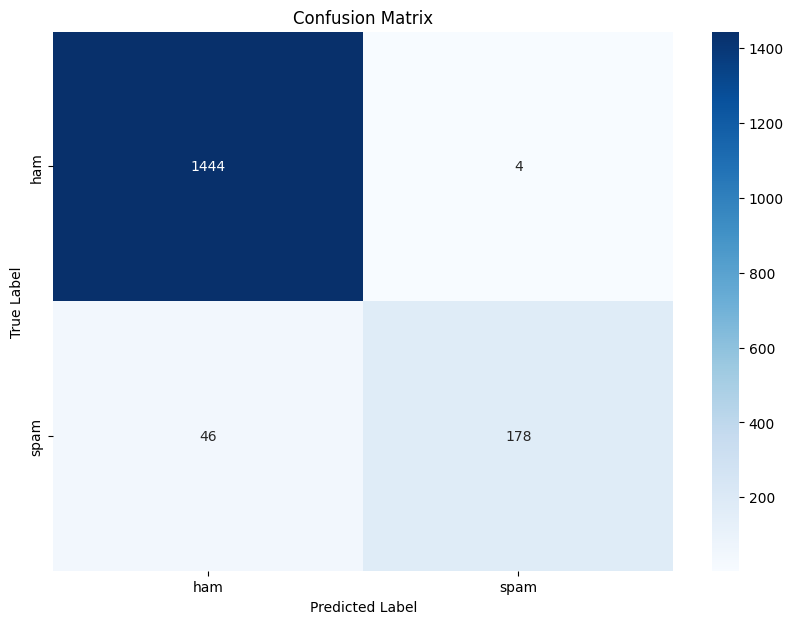

In [87]:
# Compute confusion matrix
class_names = ['ham', 'spam']
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Based on the evaluation of the logistic regression model using L2 regularization and SGDClassifier with the provided dataset, the following conclusions can be drawn:

Model Performance:

The logistic regression model with L2 regularization achieved a high accuracy of approximately 97%. The precision and recall for 'ham' messages are very high, indicating that the model is effective in identifying non-spam messages.
For 'spam' messages, the precision is also high, but recall is somewhat lower, suggesting that while the model is good at identifying spam messages, there might be some spam messages that are not detected.
The confusion matrix shows that the model performs well, with a small number of false positives and false negatives, confirming that the model's predictions are reliable.
Regularization:

Using L2 regularization helps in preventing overfitting by penalizing large coefficients, leading to a more generalized model.
SGDClassifier:

The SGDClassifier with logistic loss and L2 regularization provides a scalable alternative to logistic regression, particularly for large datasets. It showed comparable performance to the logistic regression model, demonstrating its efficiency and versatility.

However, it is important to note that the data is not evenly distributed. As observed in the EDA, there are many more values in the "ham" category. This imbalance also influences the model's performance, leading to more errors in predicting the "spam" category.
